# **Marketing Campaign Analysis**

## **Executive Summary**

### **The objective:**

 - The objective of this audience segmentation is to identify distinguishing characteristics of our audience members in order to provide insights into their behavior and develop stratagies for how best to advertise to them in the future.

### **Best solution summary:**

 - I found that the best solution to achieve this goal was clustering using a gausian mixture method with the following 6 clusters.

1.   Low Income savers
2.   Low Income spenders
3.   Medium Income Online Shoppers
4.   Medium Income balanced shoppers
5.   High Income late adopters
6.   High Income small families


### **Next Steps:**

 - Improve data quality & provide context for future analysis
 - Create specialized marketing campaigns


## **Problem Definition**

### **Actual Objective:**

 - Segmenting our customer base in ways that can allow us to personalize our marketing stratagies in ways that will appeal to them more in the future.

### **Data Overview:**

 - Our dataset contained the following features:


1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** The data was collected in the year 2016.

### **Solution Approach:**

 - In order to reach our final best solution I took the following steps


1.   Performing exploratory Data Analysis including univariate and bivariate analysis and Data Cleaning
2.   Performing Primary Component Analysis and T-distributed Stochastic Neighbor Embedding
3.   Performing K-Means, K-Medoids, Hierarchical Clustering, DBSCAN, & Gaussian Mixture Model clustering techniques with a variety of different settings.
4.   Creating a profile of the various clusters for each of the possible solutions.
5.   Suggesting reccomendations for stake holders on how to capitalize on the insights obtained.




## **The following is the best solution**
(in my opinion)

## **Import the necessary libraries and load the data**

In [1]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 10.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=1959516 sha256=dba1f7d4c531913c1a5538807f1a373aa4970af7fa582eae10e3b3a5e7d2f971
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [2]:
!pip install numpy==1.26.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.36.3 requires numpy>=2.0, but you have numpy 1.26.0 which is incompatible.
rasterio 1.5.0 requires numpy>=2, but you have numpy 1.26.0 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.0 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.0 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; pyth

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute Silhouette scores
from sklearn.metrics import silhouette_score

# Importing PCA
from sklearn.decomposition import PCA

# Importing TSNE
from sklearn.manifold import TSNE

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
folderpath="/content/drive/MyDrive/data_skills_showcase/audience_segmentation/"

Mounted at /content/drive


## **Data Cleaning**

In [3]:
# Reading in our dataset
df = pd.read_csv(folderpath+"marketing_campaign.csv")

In [4]:
# imnputing missing data
df.fillna(df['Income'].median(), inplace=True)

# Not getting any use out of the decimal places so the field doesn't need to be a float
df['Income'] = df['Income'].astype(int)

# Removing huge income outlier which probably should have been done first but it didn't happen that way during my initial analysis so we're staying consistent
df = df.drop(df[df.Income > 300000].index)

# It is not impossible that there could be unique individuals whose metrics exactly match anothers but my intuition is that 182 out of 2240 matching on 26 fields is not a statistical outlier it's a data issue.  The duplicate rows need to be removed.
df.drop_duplicates(subset=df.columns.difference(['ID']), inplace=True)

# If we go one level deeper we also see that there are severl duplicates that exist when ignoring the ID & Response field.  This feels exceptionally unlikely to be anything other than a data error and the solution that makes the most sense to be is to remove the rows that responded with a 0.
# My reasoning is that the only thing that makes sense to me is someone would initially reject the offer (a 0 response) and then return to the promotion later and choose to accept it (a 1 response).
dupe_resp = df[df.duplicated(subset=df.columns.difference(['ID', 'Response']), keep=False )].sort_values(by=['Year_Birth', 'Income', 'Response'])

df.drop(index = list(dupe_resp[dupe_resp['Response']==0].index), inplace=True)

# Recatagorizing education
df['Education'] = df['Education'].replace('2n Cycle','Master')

df['Marital_Status'] = df['Marital_Status'].replace('YOLO','Divorced')
df['Marital_Status'] = df['Marital_Status'].replace('Alone','Divorced')
df['Marital_Status'] = df['Marital_Status'].replace('Absurd','Single')

# Updating Year_Birth to datedate datatype
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
df['Year_Birth'] = df['Year_Birth'].dt.year

# Dropping anyone who claims to be born before 1910 from our data
df = df.drop(df[df.Year_Birth < 1910].index)
df.reset_index(drop=True)

# We need to convert or Dt_Customer field to an actual Datetime Format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# We'll also add a field that's just the year part so we can get a better sense of how long our customers have been with us as a whole while graphing
df['Yr_Customer'] = df['Dt_Customer'].dt.year

### Feature Engineering

In [5]:
# Defining age based on our knowledge of when the dataset was collected
df['Age'] = 2016 - df['Year_Birth']

#Combining product catagories
df['MntFoods'] = df['MntMeatProducts']  + df['MntFishProducts'] + df['MntFruits']
df['MntLuxuryProducts'] = df['MntGoldProds']  + df['MntSweetProducts'] + df['MntWines']

# Combining dependent catagories
df['Kids'] = df['Kidhome'] + df['Teenhome']

def adult_count(row):
  if row['Marital_Status'] == 'Single':
    return 1
  elif row['Marital_Status'] == 'Widow':
    return 1
  elif row['Marital_Status'] == 'Divorced':
    return 1
  elif row['Marital_Status'] == 'Married':
    return 2
  elif row['Marital_Status'] == 'Together':
    return 2
  else:
    return 0

# Determining # of adults in a home
df['Adults'] = df.apply(adult_count, axis=1)

# Determine family size
df['Family_Size'] = df['Adults'] + df['Kids']

# Total expenses with the company
df['Expenses'] = df['MntLuxuryProducts'] + df['MntFoods']

# Thought process here is that Web, Catalog, and Store signify purchases while df['NumDealsPurchases'] is how many of those purchases were made with a discount
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Removing some dramatic outliers and people who have made zero purchases
df = df.drop(df[df.NumTotalPurchases == 0].index).reset_index(drop=True)
df = df.drop(df[(df['NumTotalPurchases'] == 1) & (df['MntMeatProducts'] == 1607)].index).reset_index(drop=True)

# # of accepted campaigns
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

# AmountPerPurchase indicating amount of money spent on each purchase
df['AmountPerPurchase'] = (df['Expenses'] / df['NumTotalPurchases']).round(2)

# We don't know exactly what the schedule for the data collection is so just for safety we should assume some extra time past 2014-10-4.
# Additionally since our spending fields are based of $ amount spent in the last 2 years it would feel appropriate to me to use the start of the new year as our cut off to count back from.
df['Days_Engaged'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days

In [6]:
# Creating new dataframe keeping only our features that describe customer behavior.
data = df.drop(
    columns = [
            # Inconsequential Fields
              'ID'
              ,'Complain'
              ,'Recency'

            # Demographic Data fields
              ,'Education'
              ,'Marital_Status'
              ,'Income'
              ,'Age'
              ,'Family_Size'

            # Removed in favor of features we've constructed ourselves. (Reduce multicollinearity)
              ,'MntFishProducts'
              ,'MntMeatProducts'
              ,'MntFruits'
              ,'MntSweetProducts'
              ,'MntWines'
              ,'MntGoldProds'

              ,'AcceptedCmp1'
              ,'AcceptedCmp2'
              ,'AcceptedCmp3'
              ,'AcceptedCmp4'
              ,'AcceptedCmp5'
              ,'Response'

              ,'Year_Birth'
              ,'Dt_Customer'
              ,'Yr_Customer'

              ,'Kidhome'
              ,'Teenhome'
              ,'Kids'
              ,'Adults'

            # Removed because I think I'll get useful insights from the original fields (Reduce multicollinearity by keeping it out)
              ,'NumTotalPurchases'
               ],
              axis=1,
)

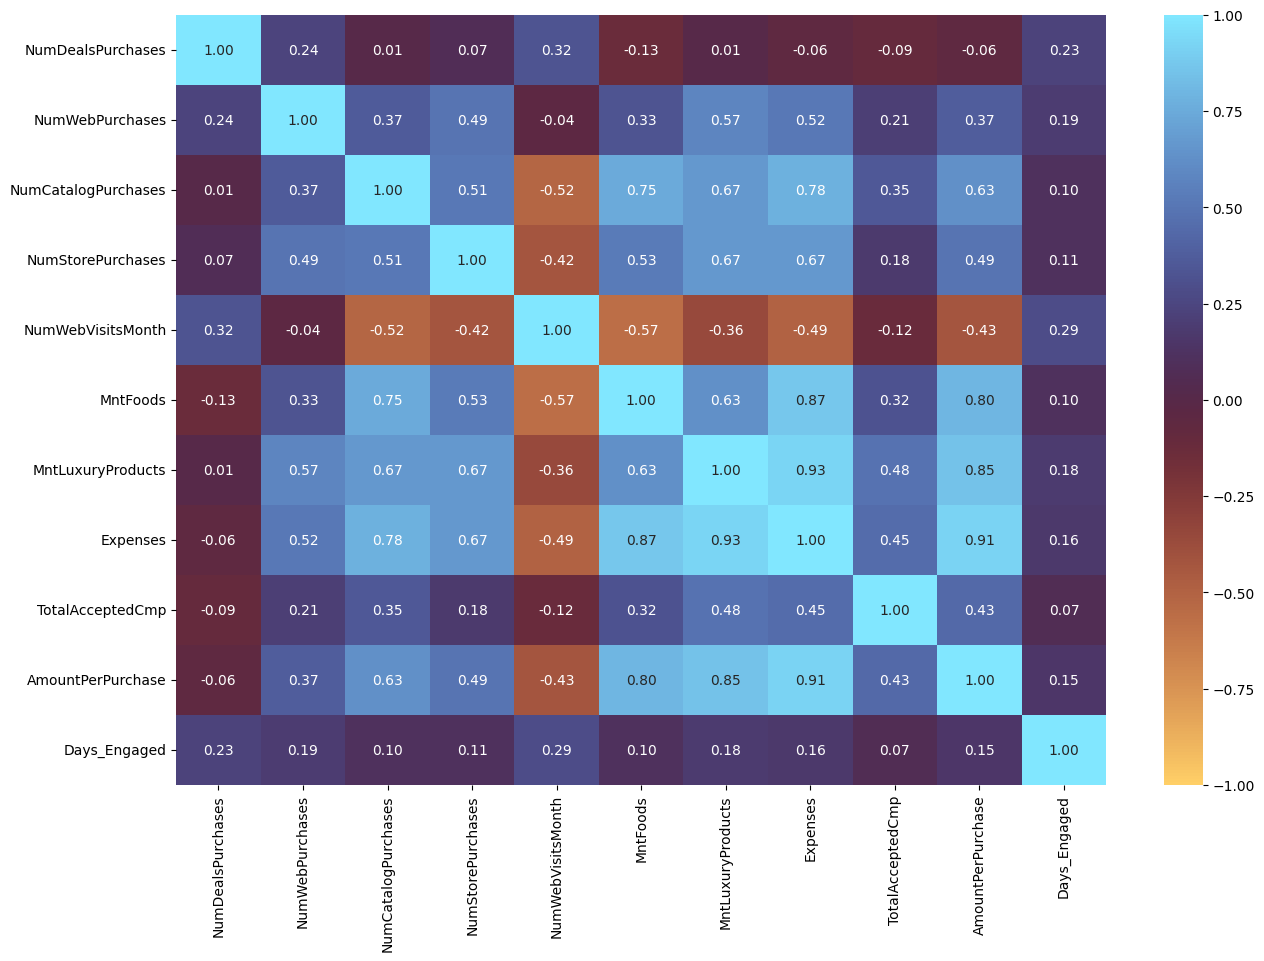

In [7]:
column_list_pca = data.columns.tolist()
# ax = plt.figure(figsize=(15, 10))
plt.figure(figsize=(15, 10))
sns.heatmap(data[column_list_pca].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="managua")
plt.show()

# fig = ax.get_figure()
# fig.savefig(f'{folderpath}heatmap.png', dpi=300, bbox_inches='tight')

### Applying a scalar to our data
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

* Doing this rescales all our features so that they have a mean of 0 and a variance of 1.  
* The purpose is to bring all our features onto a common scale without changing the differences in the range of the values.
* Having data that is on a standard scale helps avoid the problem of having one feature that is on a larger scale from dominating the others because the unsupervised learning algorithms rely on distance to find the similarity between data points.

In [8]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data_scaled.head()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntFoods,MntLuxuryProducts,Expenses,TotalAcceptedCmp,AmountPerPurchase,Days_Engaged
0,0.357370,1.389625,2.495646,-0.557511,0.715891,2.006757,1.151412,1.679428,0.611926,1.190563,1.539699
1,-0.170871,-1.114770,-0.568222,-1.177716,-0.125504,-0.777567,-0.946377,-0.965266,-0.508097,-1.021009,-1.187336
2,-0.699112,1.389625,-0.227792,1.303102,-0.546201,0.193628,0.299599,0.280568,-0.508097,0.040877,-0.200645
3,-0.170871,-0.756999,-0.908652,-0.557511,0.295193,-0.690229,-0.943731,-0.922019,-0.508097,-0.952094,-1.058422
4,1.413853,0.316313,0.112637,0.062693,-0.125504,-0.085853,-0.425236,-0.308251,-0.508097,-0.246048,-0.949340


## **Applying T-SNE (t-distributed Stochastic Neighbor Embedding) and PCA (Principal Component Analysis) to the data to visualize the data distributed in 2 to 3 dimensions**

In [9]:
# Fitting T-SNE with number of components equal to 2 to visualize how data is distributed
def tsne(p):
  tsne2 = TSNE(n_components = 2, random_state = 1, perplexity = p) # Initializing T-SNE with perplexity p
  data_tsne2 = tsne2.fit_transform(data_scaled)                    # fit_transform T-SNE on new data
  data_tsne2 = pd.DataFrame(data_tsne2, columns=[0, 1])            # Converting the embeddings to a dataframe
  plt.figure(figsize=(7, 7))                                       # Scatter plot for two components
  sns.scatterplot(x=0, y=1, data=data_tsne2)


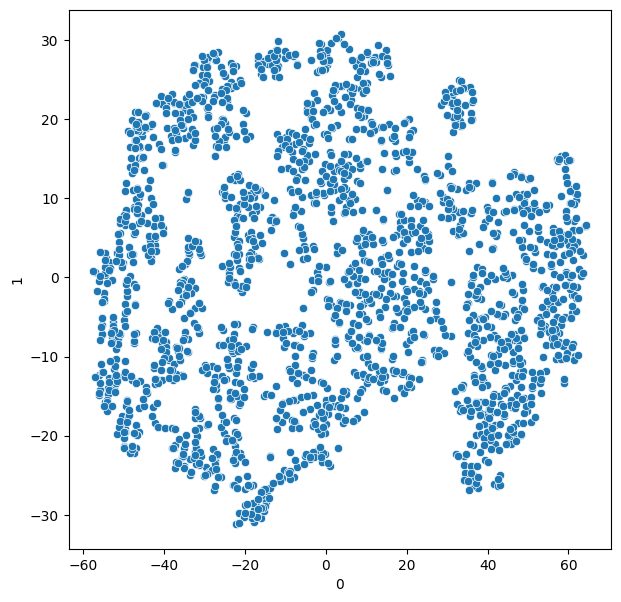

In [10]:
tsne(35)

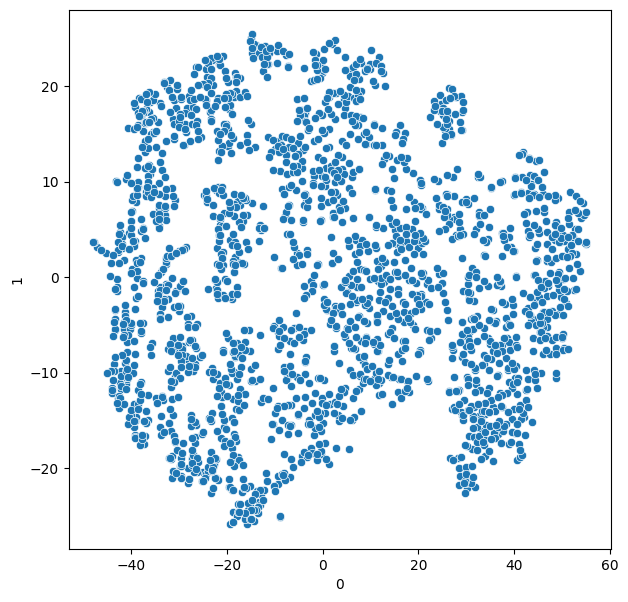

In [11]:
tsne(50)

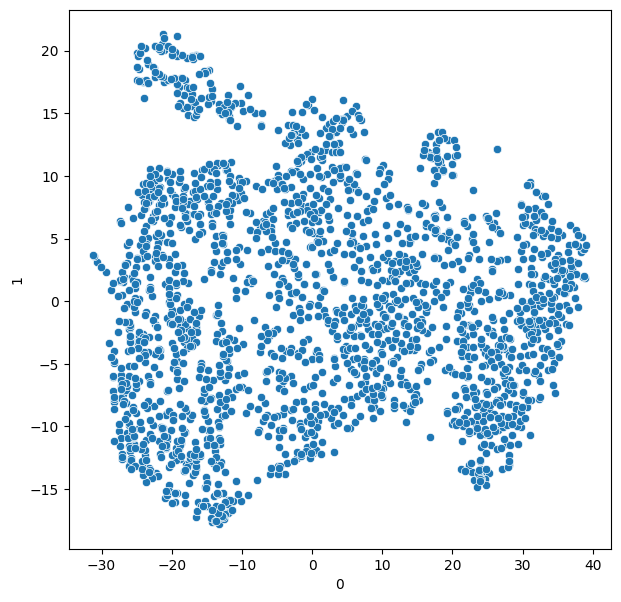

In [12]:
tsne(85)

In [13]:
# T-SNE with 3 components
tsne3 = TSNE(n_components = 3, random_state = 1, perplexity = 35)
data_tsne3 = tsne3.fit_transform(data_scaled)
data_tsne3 = pd.DataFrame(data_tsne3, columns = ['X1', 'X2', 'X3'])

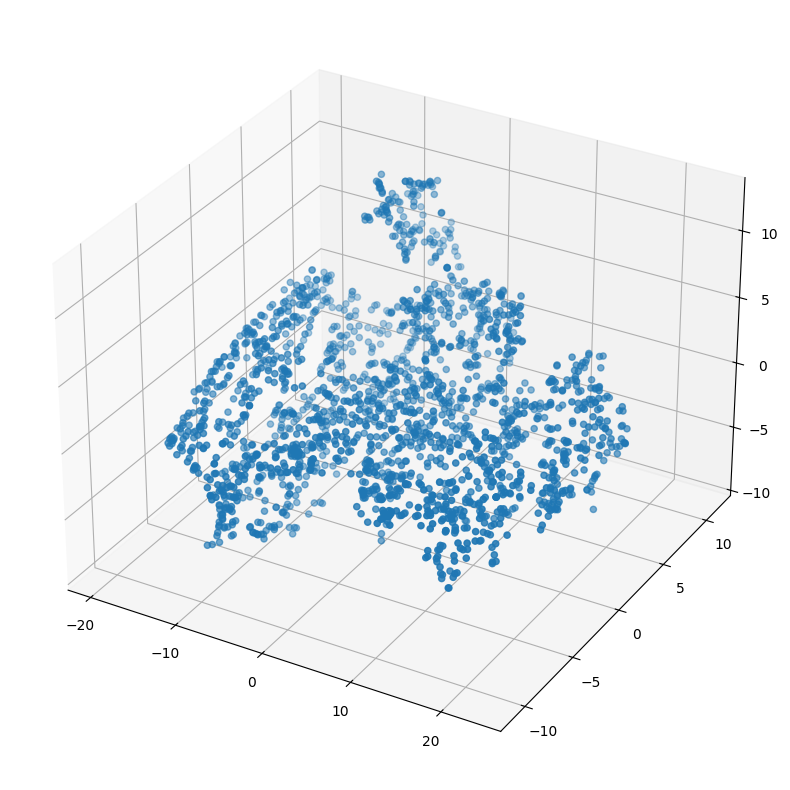

In [14]:
# Scatter plot for all three components
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
x = data_tsne3['X1']
y = data_tsne3['X2']
z = data_tsne3['X3']
ax.scatter(x, y, z)
plt.show()

**Observation and Insights:** T-SNE when reduced to 2 dimensions with various perpexity values results in some very obserable clustering with it converginging a bit into a more blob shape once you reach 85 perplexity.
Trying to evaluate T-SNE in 3 dimensions is more difficulty to evaluate but I do see what appears to be about 3 or 4 different pillars of data points.

### **Applying PCA**

When the variables used in clustering are highly correlated, it causes multicollinearity, which affects the clustering method and results in poor cluster profiling (or biased toward a few variables). Because of this we will use PCA to reduce the multicollinearity between the variables before we determine the number of clusters to use.

In [15]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]                                      # Storing the number of variables in the data
pca = PCA(n_components = n, random_state = 1)                 # Initialize PCA with n_components = n and random_state=1
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))       # fit_transform PCA on the scaled data # create data_pca

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_

**Let's plot the first two components and see how the data points are distributed.**

In [16]:
ncomponents = data_scaled.shape[1]

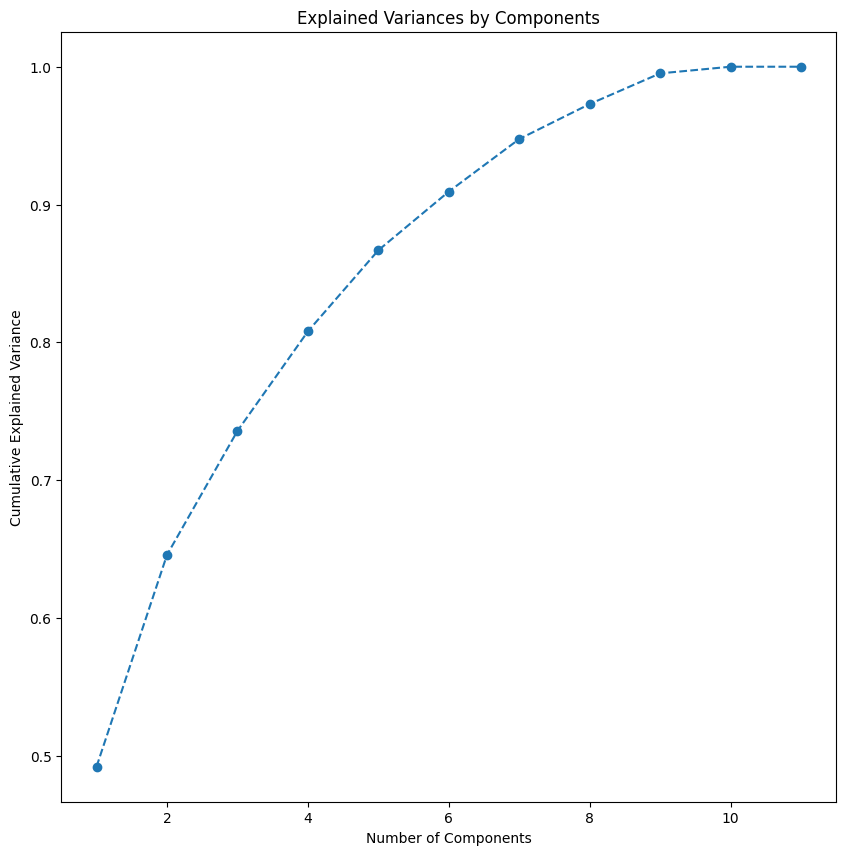

In [17]:
# Scatter plot for two components using the dataframe data_pca
# ax = plt.figure(figsize = (10, 10))
plt.figure(figsize = (10, 10))
plt.plot(range(1, ncomponents + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

# fig = ax.get_figure()
# fig.savefig(f'{folderpath}PCA.png', dpi=300, bbox_inches='tight')

In [18]:
# Finding the least number of components that can explain more than 70% variance
sum = 0
min = 0

for ix, i in enumerate(exp_var):

    sum = sum + i

    if(sum>0.85):
        print("Number of PCs that explain at least 85% variance:", ix + 1)
        min = ix + 1
        break

Number of PCs that explain at least 85% variance: 5


In [19]:
reduction = int((1 - min / ncomponents ) * 100)
print(f'This represnts a {reduction}% reduction in dimensionality with only a 15% loss in variance')

This represnts a 54% reduction in dimensionality with only a 15% loss in variance


In [20]:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

data_pca_t = pd.DataFrame(np.round(pca.components_[:5,:],2), index = pc_comps, columns = data_scaled.columns)

data_pca_t.T

,PC1,PC2,PC3,PC4,PC5
NumDealsPurchases,-0.02,0.56,-0.35,-0.15,0.69
NumWebPurchases,0.24,0.38,-0.23,-0.39,-0.44
NumCatalogPurchases,0.35,-0.05,-0.07,0.12,0.32
NumStorePurchases,0.31,0.08,-0.40,-0.06,-0.31
NumWebVisitsMonth,-0.24,0.49,0.29,-0.09,-0.10
MntFoods,0.37,-0.13,-0.01,0.27,0.17
MntLuxuryProducts,0.39,0.12,0.07,-0.13,-0.13
Expenses,0.42,0.01,0.04,0.04,-0.00
TotalAcceptedCmp,0.21,0.01,0.68,-0.49,0.17
AmountPerPurchase,0.38,-0.01,0.16,0.10,0.11


In [21]:
def color_high(val):

    if val <= -0.25:
        return 'background: pink'

    elif val >= 0.25:
        return 'background: skyblue'

data_pca_t.T.style.map(color_high)

,PC1,PC2,PC3,PC4,PC5
NumDealsPurchases,-0.020000,0.560000,-0.350000,-0.150000,0.690000
NumWebPurchases,0.240000,0.380000,-0.230000,-0.390000,-0.440000
NumCatalogPurchases,0.350000,-0.050000,-0.070000,0.120000,0.320000
NumStorePurchases,0.310000,0.080000,-0.400000,-0.060000,-0.310000
NumWebVisitsMonth,-0.240000,0.490000,0.290000,-0.090000,-0.100000
MntFoods,0.370000,-0.130000,-0.010000,0.270000,0.170000
MntLuxuryProducts,0.390000,0.120000,0.070000,-0.130000,-0.130000
Expenses,0.420000,0.010000,0.040000,0.040000,-0.000000
TotalAcceptedCmp,0.210000,0.010000,0.680000,-0.490000,0.170000
AmountPerPurchase,0.380000,-0.010000,0.160000,0.100000,0.110000


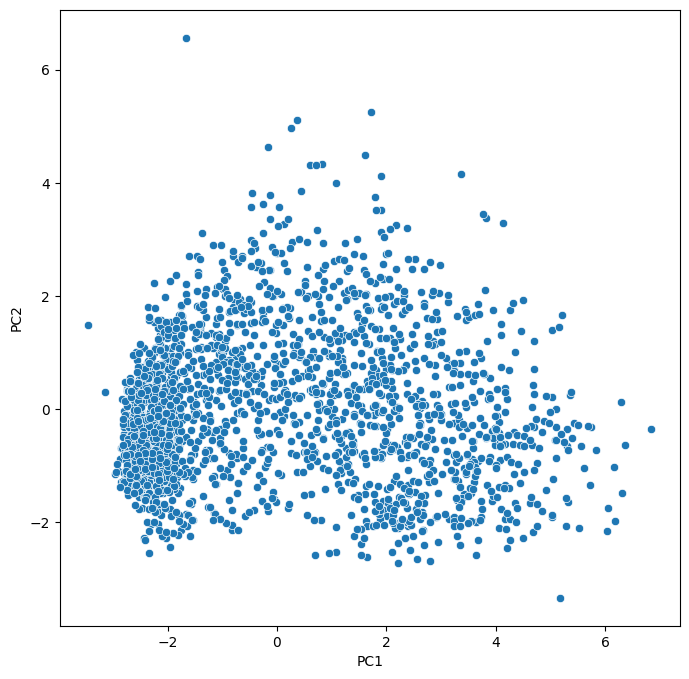

In [22]:
# This is the plot we will be breaking into clusters.
# I would cut it down the middle if I were doing it by eye maybe 3rds
plt.figure(figsize = (8,8))
sns.scatterplot(x = data_pca[0], y = data_pca[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



In [23]:
# Adding numeric demographic columns to PCA fields to do analysis on
demographic_columns = ['Income', 'Age', 'Family_Size', 'NumTotalPurchases'] # always included

product_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
family_columns = ['Kids', 'Adults']

columns_analysis = column_list_pca + demographic_columns

## **Gaussian Mixture Model**

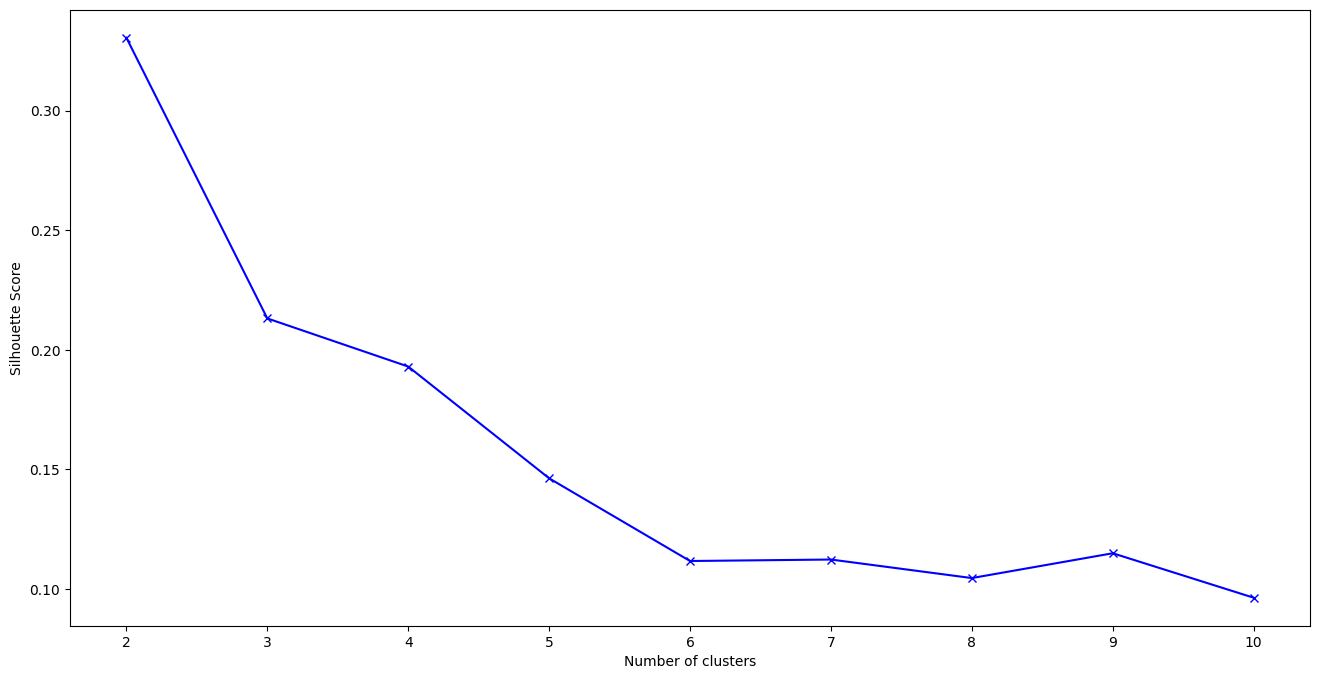

In [24]:
# Empty dictionary to store the Silhouette score for each value of K
sc = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K
for k in range(2, 11):

    GMM = GaussianMixture(
    n_components=k,          # k clusters
    random_state=1,          # Seeding the randomization for consistent results across runs
    covariance_type='full',  # Default in older versions
    init_params='kmeans',    # Ensures 'kmeans' initialization
    tol=1e-3,                # Standard tolerance (check old sklearn defaults if unsure)
    max_iter=100,            # Standard max iterations in older versions
    n_init=10                # Matches the old default behavior
    )

    GMM.fit(data_pca)
    labels = GMM.predict(data_pca)

    sc[k] = silhouette_score(data_pca, labels)

# Elbow plot
# ax = plt.figure(figsize=(16, 8))
plt.figure(figsize=(16, 8))
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

# fig = ax.get_figure()
# fig.savefig(f'{folderpath}elbow', dpi=300, bbox_inches='tight')


GMM with 6 Clusters

In [25]:
GMM6 = GaussianMixture(
    n_components=6,          # 5 clusters
    random_state=1,          # Seeding the randomization for consistent results across runs
    covariance_type='full',  # Default in older versions
    init_params='kmeans',    # Ensures 'kmeans' initialization
    tol=1e-3,                # Standard tolerance (check old sklearn defaults if unsure)
    max_iter=100,            # Standard max iterations in older versions
    n_init=10                # Matches the old default behavior
)

df_gmm6 = data_pca.copy()

GMM6.fit(df_gmm6)

g6label='Gaussian_Clusters'

df_gmm6[g6label] = GMM6.predict(df_gmm6)

In [26]:
df_gmm6[g6label] = df_gmm6[g6label] .astype(str)

In [27]:
low1 = 'Low_Spender'
low2 = 'Low_Thrifty'
mid1 = 'Mid_Online'
mid2 = 'Mid_Balanced'
high1 = 'High_Late'
high2 = 'High_Small'

In [28]:
df_gmm6[g6label] = df_gmm6[g6label].replace('0', low2)
df_gmm6[g6label] = df_gmm6[g6label].replace('5', low1)
df_gmm6[g6label] = df_gmm6[g6label].replace('2', mid1)
df_gmm6[g6label] = df_gmm6[g6label].replace('3', mid2)
df_gmm6[g6label] = df_gmm6[g6label].replace('1', high1)
df_gmm6[g6label] = df_gmm6[g6label].replace('4', high2)

In [29]:
df_gmm6[g6label].value_counts()

,count
Gaussian_Clusters,
Low_Thrifty,629
Mid_Balanced,603
High_Small,277
High_Late,257
Mid_Online,135
Low_Spender,127


In [30]:
cluster_labels = [low1, low2, mid1, mid2, high1, high2]

In [31]:
folderpath

'/content/drive/MyDrive/data_skills_showcase/audience_segmentation/'

In [32]:
def PCA_PLOT(X, Y, PCA, cluster, highlight = None, save=False):

  fig = plt.figure(figsize=(8,8))


  color_plot = { low1  : '#ffd92f'
               , low2  : '#66c2a5'
               , mid1  : '#a6d854'
               , mid2  : '#8da0cb'
               , high1 : '#fc8d62'
               , high2 : '#e78ac3'
               }

  if highlight:
    color_plot[highlight] = '#000000'

  ax = sns.scatterplot(x=X, y=Y, data=PCA, hue=cluster, hue_order=cluster_labels, palette=color_plot)
  ax.set_xlabel('')
  ax.set_ylabel('')

  if save == True:

    if not highlight:
      highlight = 'default'

    fig = ax.get_figure()
    fig.savefig(f'{folderpath}{highlight}.png', dpi=300, bbox_inches='tight')

  else:
    ax

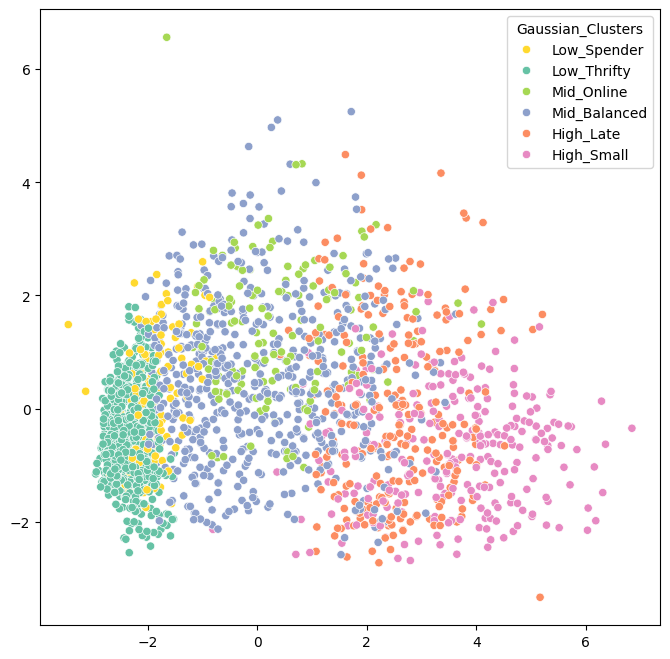

In [33]:
  PCA_PLOT(0,1,df_gmm6,g6label, save=True)

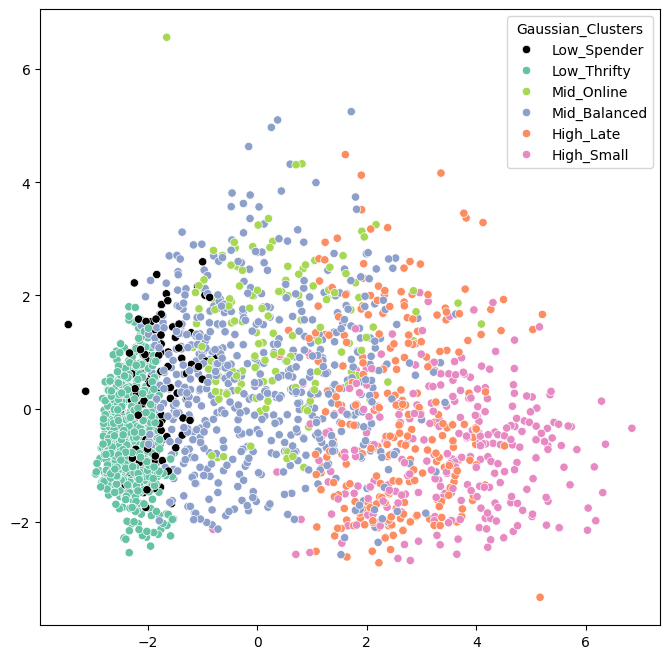

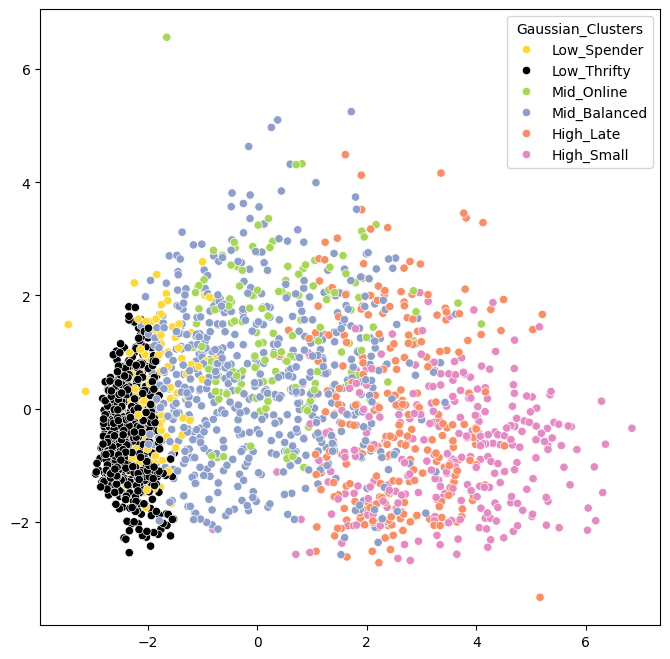

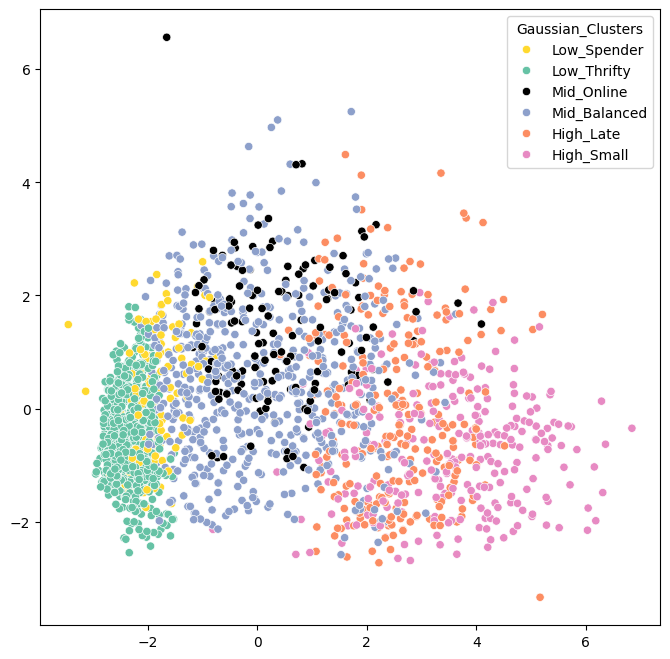

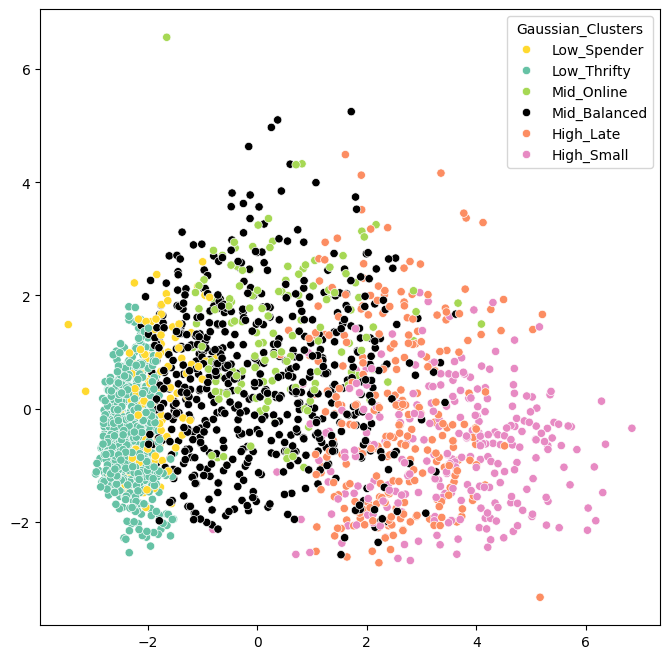

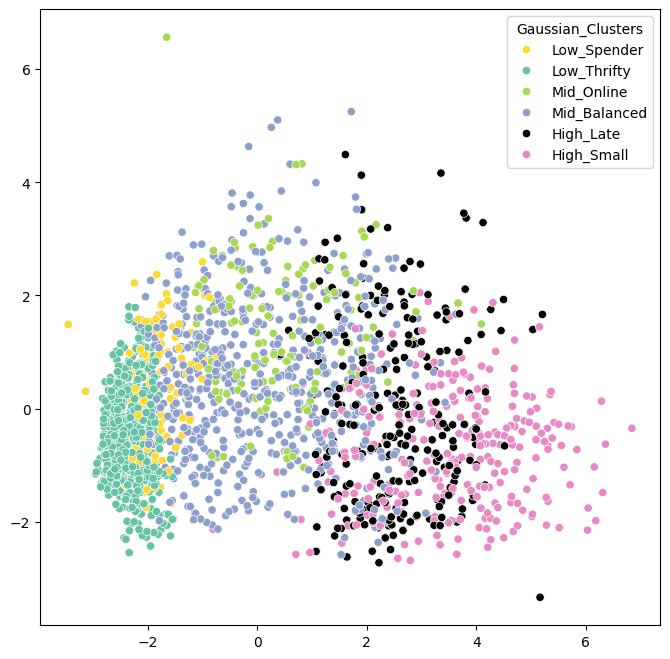

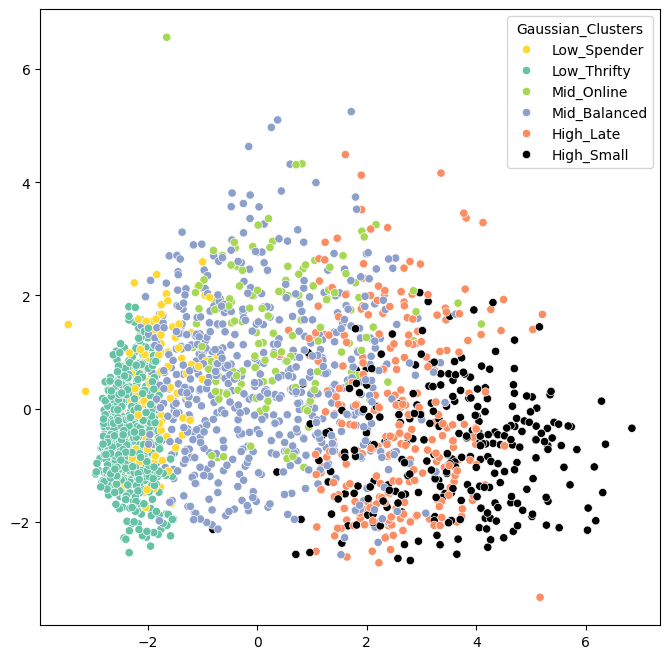

In [34]:
for label in cluster_labels:
  PCA_PLOT(0,1,df_gmm6,g6label, label, save=True)

In [35]:
#Adding labels to our initial DF
df[g6label] = df_gmm6[g6label]

In [36]:
gmm6_analysis = columns_analysis + product_columns + family_columns + campaign_columns + [g6label]

mean = df[gmm6_analysis].groupby(g6label).mean()
median = df[gmm6_analysis].groupby(g6label).median()

df_gmm6_analysis = pd.concat([mean, median], axis = 0)
df_gmm6_analysis.index = [high1 + ' Mean', high2 + ' Mean', low1 + ' Mean', low2 + ' Mean', mid2 + ' Mean', mid1 + ' Mean', high1 + ' Median', high2 + ' Median', low1 + ' Median', low2 + ' Median', mid2 + ' Median', mid1 + ' Median']

df_gmm6_analysis.T.style.highlight_max(color='darkgreen', axis=1).highlight_min(color='indianred', axis=1).format('{:.3f}')

,High_Late Mean,High_Small Mean,Low_Spender Mean,Low_Thrifty Mean,Mid_Balanced Mean,Mid_Online Mean,High_Late Median,High_Small Median,Low_Spender Median,Low_Thrifty Median,Mid_Balanced Median,Mid_Online Median
NumDealsPurchases,2.288,1.061,2.228,1.773,3.139,3.993,1.000,1.000,2.000,1.000,3.000,4.000
NumWebPurchases,5.241,5.036,2.197,1.645,5.456,7.415,5.000,5.000,2.000,2.000,5.000,7.000
NumCatalogPurchases,5.471,5.949,0.858,0.281,2.756,3.044,4.000,6.000,1.000,0.000,2.000,2.000
NumStorePurchases,7.728,7.917,2.583,2.981,7.461,6.496,8.000,8.000,2.000,3.000,7.000,6.000
NumWebVisitsMonth,3.856,2.899,7.488,6.258,5.275,6.541,3.000,2.000,7.000,7.000,5.000,7.000
MntFoods,513.350,671.343,32.488,21.803,192.267,133.067,500.000,668.000,26.000,19.000,145.000,94.000
MntLuxuryProducts,796.043,864.350,68.134,34.064,368.740,485.756,797.000,858.000,45.000,28.000,323.000,463.000
Expenses,1309.393,1535.693,100.622,55.866,561.007,618.822,1295.000,1603.000,79.000,48.000,490.000,546.000
TotalAcceptedCmp,0.580,1.646,1.197,0.000,0.000,1.207,0.000,1.000,1.000,0.000,0.000,1.000
AmountPerPurchase,71.287,85.703,18.284,10.702,33.276,37.073,70.930,84.750,14.500,10.000,33.180,35.170


In [37]:
# % of DINKs with kids
df[(df['Kids'] > 0) & (df['Gaussian_Clusters'] == high2)].shape[0] / df[df['Gaussian_Clusters'] == high2].shape[0]

0.1299638989169675

In [38]:
with pd.option_context('display.max_rows', None):
  display(df[['Yr_Customer', 'Gaussian_Clusters', 'TotalAcceptedCmp', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].where(df['Gaussian_Clusters']==high2).dropna(how='all').sort_values(by='Yr_Customer', ascending=False))

,Yr_Customer,Gaussian_Clusters,TotalAcceptedCmp,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
494,2014.0,High_Small,1.0,0.0,0.0,0.0,0.0,1.0,0.0
626,2014.0,High_Small,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1302,2014.0,High_Small,2.0,0.0,0.0,1.0,0.0,1.0,0.0
1361,2014.0,High_Small,4.0,1.0,0.0,0.0,1.0,1.0,1.0
1384,2014.0,High_Small,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,2014.0,High_Small,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,2014.0,High_Small,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1420,2014.0,High_Small,3.0,1.0,0.0,0.0,0.0,1.0,1.0
1450,2014.0,High_Small,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,2014.0,High_Small,2.0,0.0,0.0,0.0,0.0,1.0,1.0


In [39]:
df.groupby(['Gaussian_Clusters'])['Expenses'].sum().sort_values(ascending=False)

,Expenses
Gaussian_Clusters,
High_Small,425387
Mid_Balanced,338287
High_Late,336514
Mid_Online,83541
Low_Thrifty,35140
Low_Spender,12779


Family_Size          1    2    3    4   5   All
Gaussian_Clusters                              
All                230  689  808  273  28  2028
Low_Spender          8   30   64   25   0   127
Low_Thrifty         21  157  293  140  18   629
Mid_Online          10   41   63   19   2   135
Mid_Balanced        35  186  298   79   5   603
High_Late           55  126   66    8   2   257
High_Small         101  149   24    2   1   277
------------------------------------------------------------------------------------------------------------------------


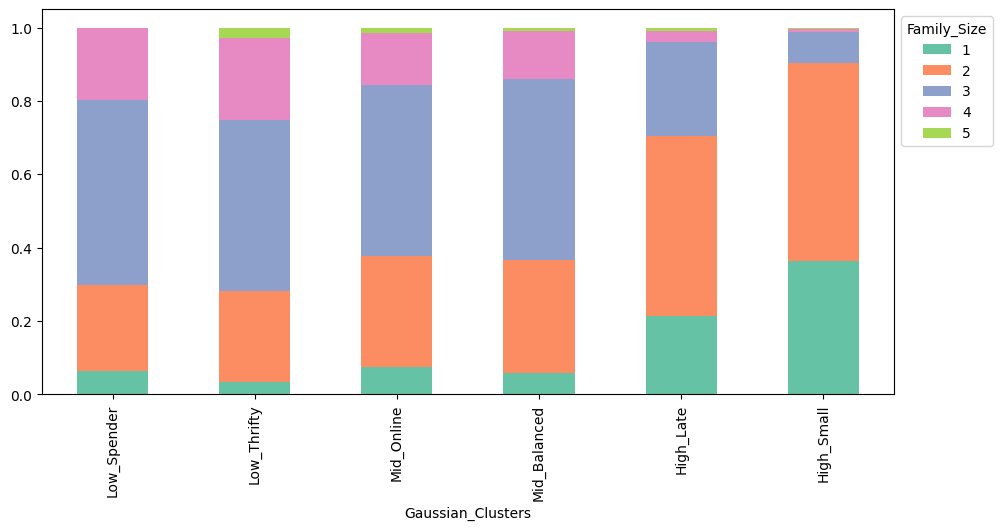

In [40]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: Cluter Label
    target: target variable
    """
    count = data[predictor].nunique()
    tab1 = pd.crosstab(data[predictor], data[target], margins=True)

    # drop the summation in the margin then sort clusters and read it (Can't sort int and str)
    all_row = tab1.loc[['All']]
    sorted_tab = tab1.drop('All').reindex(index=cluster_labels)
    tab1_sorted = pd.concat([all_row, sorted_tab])

    print(tab1_sorted)
    print("-" * 120)

    tab = pd.crosstab(data[predictor], data[target], normalize="index").reindex(index=cluster_labels)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3'])
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title=target)
    plt.show()

stacked_barplot(df,g6label, 'Family_Size')

**Observations and Insights:**

Still primarily broken into 3 groups of income with sub clusters in each income bracket

Lower Income Clusters ~32K

Tend to have the most kids, larger families, and higher web site engagement

* Low Income & Thrifty
  * Size 629
  * Rarely makes any catalog purchases
  * Has not accepted a single campaign
  * Buys small items or deals amounting to  $10/purchase
    
    * Spent about $55 total

* Low Income Spenders
  *	Size 127
  * Spent more per purchase ~$18/per
  * Has accepted 1.6 campaigns on average
  * Lower income than cluster 0 but spends twice as much
    * Biggest difference in spending on gold, wine, and meats
    * Spent $100 on average
    

Medium Income Clusters ~54K

* Medium Income Online Shoppers
  * Size 135
  * Highest number of web purchases (7.5)
  * Purchases more weighted to luxury products than Cluster 3 (75%)
  * Spends heavily on wine (65% of total)
  * 25 to 40% engagmenet with campaigns 3,4 and 6

* Medium Income Balanced
  * Size 603
  * Has not engaged with a single campaign
  * More balanced spending between foods and luxury items
    * Still spends 50% of their expenses on wine

Higher Income Clusters

Smaller families.  Most 2 or less

Spends about 3x as much as medium income clusters

* High Income late adopters ~70K
  * Size 257
  * avg # of kids .5
  * Oldest cluster Avg age of 50
  * Much less engaged with previous campaigns
  * Spends most heavily on wine and meat

* High Income small families ~79K
  * Size	277
  * avg # of kids .15
  * Spends the most on all catagories of product
  * Visits the website the least but makes similar amount of purchases across all avenues
  * Purcheses the fewest deals.  Isn't motivated by deals.
  * Most engaged with previous campaigns
    * Campaign 1 and 5 were much more engaged than the average
  * Spends most heavily on wine and meat

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Of the techniques that I employed the ones that I felt performed the best were KMeans, KMedoids, and Gaussian Mixture Model.  DBSCAN and Heirarchical Clustering felt that they did not perform well in this scenario simply due to either the size or shape of our dataset and I don't think any type of additional tuning would have changed that.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

People are spending so much money on wine with us.  I would hope that this business is primarily selling wine.  

We really need to know what the previously accepted marketing campaigns were about.  

We also saw that twice as many people signed up in the year 2013 compared to 2012 and 2014.  If we had insights into what happened that year it would inform potentially strong marketing decisions that stakeholders should try to replicate the success of.

We would also benefit greatly from location data.  Primarily a customer's proximity to a physical store locat.  We could likely predict preferred shopping mehotds better that way.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

My reccomendation is to use the final Model tested, Gausian Mixture model with 6 clusters.  The silhuette score was not as good but it had a clear elbow and the additional clusters broke each of our overarching income based clusters apart and provided more fine detail and character to each cluster which I believe will lead to more actionable attempts to cater to the different groups with specialized marketing.

For example, campaigns 1 & 5 were really popular with our biggest spenders who have very few children and love to buy Meats and wine.  If we knew what those campaigns were about that would probably lead to some great insights into who those people are and how we can match the success of those campaigns in the future to market directly to that demographic.

### **Reccomendations for implementation**

The benefits of this solution are they you gain more detailed insights into the audience's behaviors and can make deeper personalization rather than simply splitting the audience by income brackets.  

The costs and conderations for the stakeholders are whether or not the increased detail is worth it at the end of the day.  If you were to proceed with creating personalized marketing for each cluster you'd need twice as many campaigns to run.  It will cost additional resources.  But you may benefit from scale.  Is the cost of 6 campaigns much more than 3?

At the very least it would probably be worth it to cater in more detail to the clusters that were providing the most income.  Both the high income clusters and the balanced middle income.